# **Regression: Feature Selection Using Lasso**

 _                           _____          _                   
| |    __ _ ___ ___  ___    |  ___|__  __ _| |_ _   _ _ __ ___  
| |   / _` / __/ __|/ _ \   | |_ / _ \/ _` | __| | | | '__/ _ \ 
| |__| (_| \__ \__ \ (_) |  |  _|  __/ (_| | |_| |_| | | |  __/ 
|_____\__,_|___/___/\___/   |_|  \___|\__,_|\__|\__,_|_|  \___| 
                                                                
 ____       _           _   _             
/ ___|  ___| | ___  ___| |_(_) ___  _ __  
\___ \ / _ \ |/ _ \/ __| __| |/ _ \| '_ \ 
 ___) |  __/ |  __/ (__| |_| | (_) | | | |
|____/ \___|_|\___|\___|\__|_|\___/|_| |_|
                                          


========== DATA LOADED FROM CSV ==========
   hours  study  age  sleep  marks
0      2      3   17      6     45
1      5      6   18      7     78
2      7      8   17      5     90
3      1      2   16      8     30
4      4      5   18      6     70

============= LASSO COEFFICIENTS TABLE ============
hours                --> 16.1768
study      

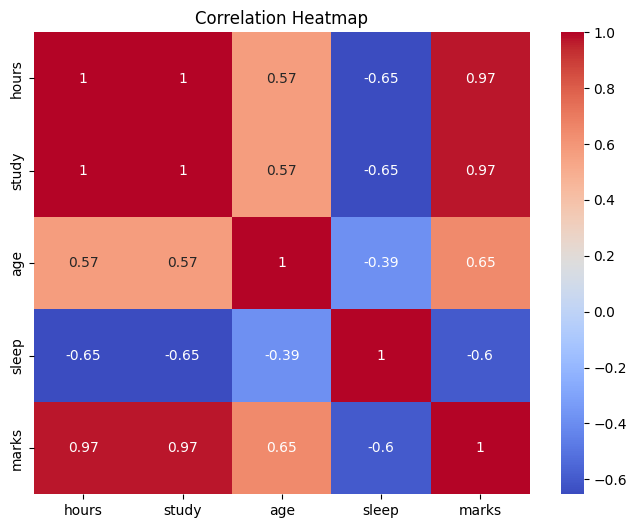

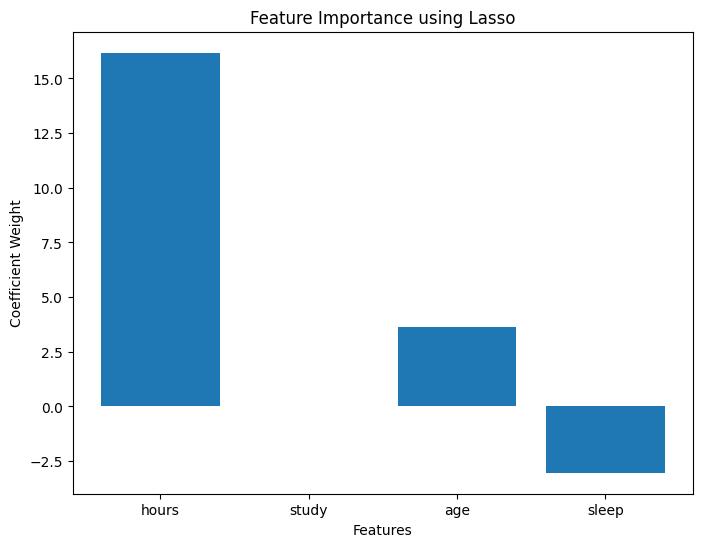

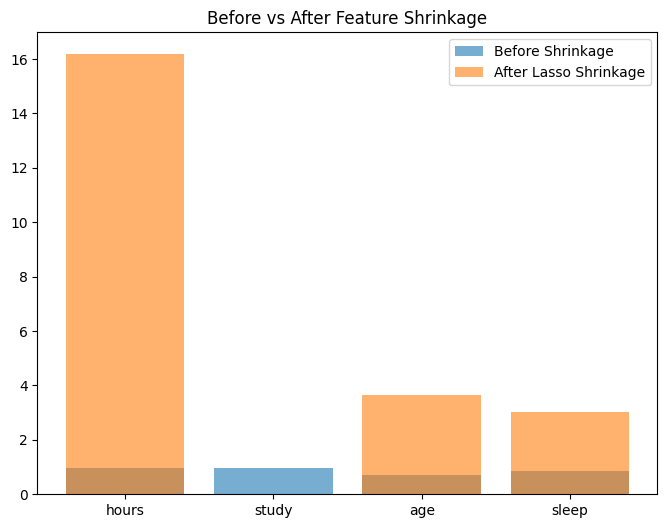

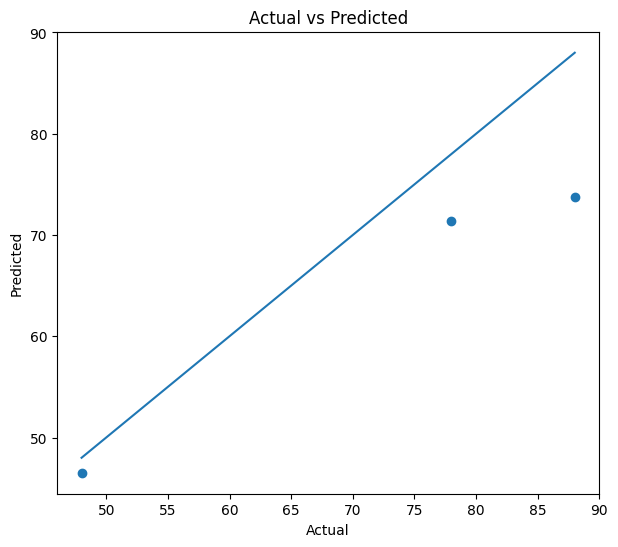

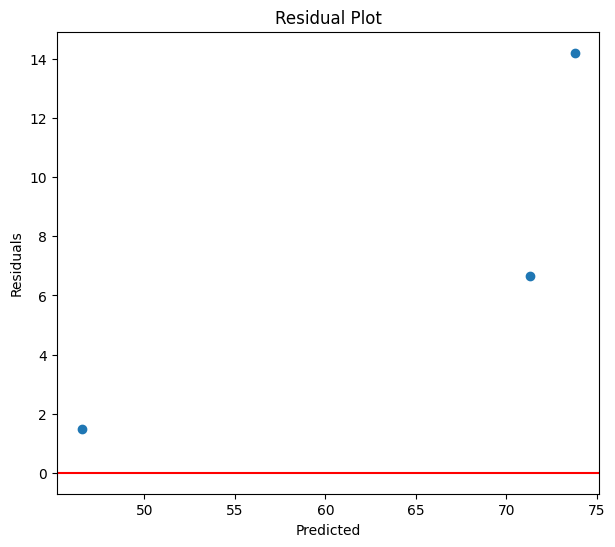

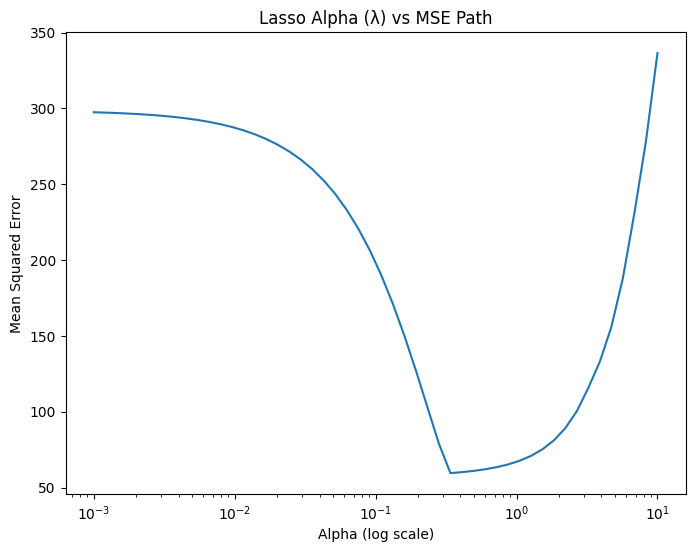

In [11]:

# INSTALL LIBRARIES
!pip install pyfiglet openpyxl

# 1. IMPORT LIBRARIES
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyfiglet import figlet_format

# 2. PRINT TITLE IN ASCII
print(figlet_format("Lasso  Feature  Selection"))

# 3. READ CSV FILE
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML(extra)/Regression/data.xlsx")
print("\n========== DATA LOADED FROM CSV ==========")
print(data.head().to_string())

# 4. DEFINE FEATURES (X) AND TARGET (y)
X = data.drop(columns=[data.columns[-1]])   # last column is target
y = data[data.columns[-1]]

# 5. SPLIT TRAIN TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. STANDARD SCALING
sascaler = StandardScaler()
X_train = sascaler.fit_transform(X_train)
X_test = sascaler.transform(X_test)

# 7. APPLY LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

coefficients = lasso.coef_
feature_names = X.columns

# 9. ASCII OUTPUT DISPLAY
print("\n============= LASSO COEFFICIENTS TABLE ============")
for fname, coef in zip(feature_names, coefficients):
    print(f"{fname:<20} --> {coef:.4f}")

print("\n============= IMPORTANT FEATURES (NON-ZERO) ============")
for fname, coef in zip(feature_names, coefficients):
    if coef != 0:
        print(f"[SELECTED]  {fname}  -->  Weight: {coef:.4f}")

print("\n============= DROPPED FEATURES (ZERO COEFFICIENT) ============")
for fname, coef in zip(feature_names, coefficients):
    if coef == 0:
        print(f"[REMOVED]  {fname}  -->  Weight: {coef:.4f}")

print("\n================ MODEL PERFORMANCE ================")
print("Lasso Model R^2 Score:", round(lasso.score(X_test, y_test),4))

# 11. ALL GRAPHS SECTION
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature Importance Bar Graph
plt.figure(figsize=(8,6))
plt.bar(feature_names, coefficients)
plt.title("Feature Importance using Lasso")
plt.xlabel("Features")
plt.ylabel("Coefficient Weight")
plt.show()

# Before vs After Shrinkage Comparison
plt.figure(figsize=(8,6))
original = abs(np.corrcoef(X_train.T, y_train, rowvar=True)[-1][:-1])
plt.bar(feature_names, original, alpha=0.6, label="Before Shrinkage")
plt.bar(feature_names, abs(coefficients), alpha=0.6, label="After Lasso Shrinkage")
plt.title("Before vs After Feature Shrinkage")
plt.legend()
plt.show()

# Actual vs Predicted Plot
y_pred = lasso.predict(X_test)
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Lasso Coefficient Path Graph (Using LassoCV)
lasso_cv = LassoCV(alphas=np.logspace(-3,1,50), cv=5).fit(X_train, y_train)
plt.figure(figsize=(8,6))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1))
plt.xscale("log")
plt.title("Lasso Alpha (λ) vs MSE Path")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error")
plt.show()